# Final project_Eunhwa Song


In [1]:
%pip install numpy pandas tensorflow tensorflow-addons plotly scikit-learn

     ------------------------------------- 742.5/742.5 kB 15.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Template for Model Building and Evaluation
Again, **make sure all the output remains printed on the notebook**.



In [2]:
import tensorflow as tf
import numpy as np


tf.random.set_seed(42)
np.random.seed(42)

In [3]:
data_path = '.\\objects\\'
CERAMIC = "ceramic.csv"
FABRIC = "fabric.csv"
GLASS = "glass.csv"
METAL = "metal.csv"
PAPER = "paper.csv" 
PLASTIC_BAG = "plastic_bag.csv" 
PLASTIC = "plastic.csv" 
STAINLESS = "stainless.csv" 
WOOD = "wood.csv"

In [3]:
# # 파일 읽기
# with open('objects\\wood.csv', 'r') as f:
#     lines = f.readlines()

# # 각 줄 끝의 콤마 제거
# lines = [line.rstrip(",\n") + "\n" for line in lines]

# # 수정된 내용 쓰기
# with open('objects\\wood2.csv', 'w') as f:
#     f.writelines(lines)

### Validation of Collected Data

The code below checks whether you collected data correctly following our instructions. The criteria are as below:
* Columns should be ['timestamp', 'accX', 'accY', 'accZ', 'gyrX', 'gyrY', 'gyrZ'].
* The sampling rate should range from 109 to 129 Hz.
* The duration of the data collection should be at least 5 minutes.

You can go to futher steps only when you passed this validation.

In [4]:
from urllib.request import urlopen
import numpy as np
import pandas as pd


COLS = ['timestamp', 'accX', 'accY', 'accZ', 'gyrX', 'gyrY', 'gyrZ']
HZ = 119
DURATION = 10 * 60 * 1000

# CERAMIC, FABRIC, GLASS, METAL, PAPER, PLASTIC_BAG, PLASTIC, STAINLESS, WOOD

for l, i in zip([0,1,2,3,4,5,6,7,8], [CERAMIC, FABRIC, GLASS, METAL, PAPER, PLASTIC_BAG, PLASTIC, STAINLESS, WOOD]):
    d = pd.read_csv(f'{data_path}{i}')
    # Check whether columns are correctly defined
    is_column_correct = np.all(np.isin(d.columns, COLS)) and  np.all(np.isin(COLS, d.columns))
    assert is_column_correct, f'A file, {l}.csv, does not have columns that we expect. Actual columns are: {d.columns}'

    # Check whether the duration of the data collection is at least 5 minutes.
    duration = d['timestamp'].max() - d['timestamp'].min()
    is_duration_correct = duration >= 5 * 60 * 1000
    assert is_duration_correct, f'A file, {l}.csv, does not have the duration that we expect. Actual duration is: {duration / (1000 * 60):.2f} minutes.'

    # Check whether the sampling rate is closed to 119 Hz.
    hz = 1000.0 / (d['timestamp'] - d['timestamp'].shift(1)).mean()
    is_hz_correct = np.isclose(hz, HZ, atol = 10)
    assert is_hz_correct, f'A file, {l}.csv, does not have the sampling rate that we expect. Actual sampling rate is: {hz:.2f} Hz'

    print(f'A file, {l}.csv, is valid!')

A file, 0.csv, is valid!
A file, 1.csv, is valid!
A file, 2.csv, is valid!
A file, 3.csv, is valid!
A file, 4.csv, is valid!
A file, 5.csv, is valid!
A file, 6.csv, is valid!
A file, 7.csv, is valid!
A file, 8.csv, is valid!


### Load and Resample Dataset

While you tried to collect sensor data with 119Hz, the actual sampling rate might be slightly different because of I/O latency. The code below loads your data from Google Drive and resamples your data with 119 Hz.

In [6]:
from urllib.request import urlopen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_data_and_compute_intensity(id):
    data = pd.read_csv(
        f'{data_path}{id}'
    ).assign(
        timestamp=lambda x: pd.TimedeltaIndex(x['timestamp'], unit='ms')
    ).set_index(
        'timestamp'
    ).resample(
        '8.4ms'
    ).interpolate('linear')

    # Compute the intensity for acceleration and gyroscope and add it as new columns
    data['acc_intensity'] = np.sqrt(data['accX']**2 + data['accY']**2 + data['accZ']**2)
    data['gyr_intensity'] = np.sqrt(data['gyrX']**2 + data['gyrY']**2 + data['gyrZ']**2)
    
    return data

CERAMIC_ = load_data_and_compute_intensity(CERAMIC)
FABRIC_ = load_data_and_compute_intensity(FABRIC)
GLASS_ = load_data_and_compute_intensity(GLASS)
METAL_ = load_data_and_compute_intensity(METAL)
PAPER_ = load_data_and_compute_intensity(PAPER)
PLASTIC_BAG_ = load_data_and_compute_intensity(PLASTIC_BAG)
PLASTIC_ = load_data_and_compute_intensity(PLASTIC)
STAINLESS_ = load_data_and_compute_intensity(STAINLESS)
WOOD_ = load_data_and_compute_intensity(WOOD)


# print(CERAMIC_.shape)
# print(FABRIC_.shape)
# print(GLASS_.shape)
# print(METAL.shape)
# print(PAPER.shape)
# print(PLASTIC_BAG.shape)
# print(PLASTIC.shape)
# print(STAINLESS.shape)
# print(WOOD.shape)

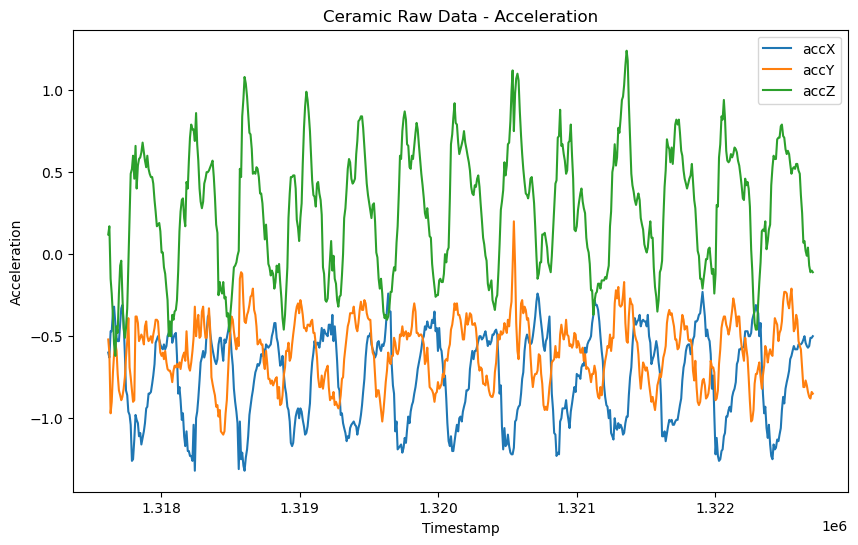

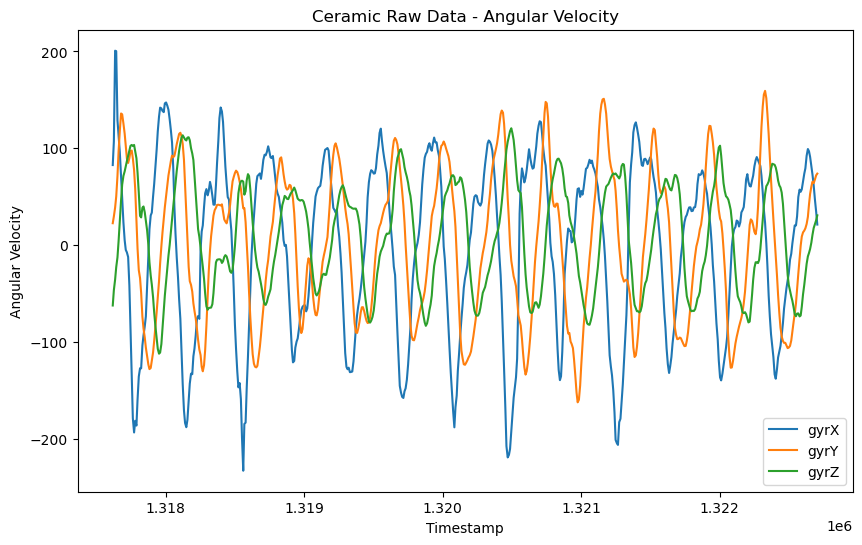

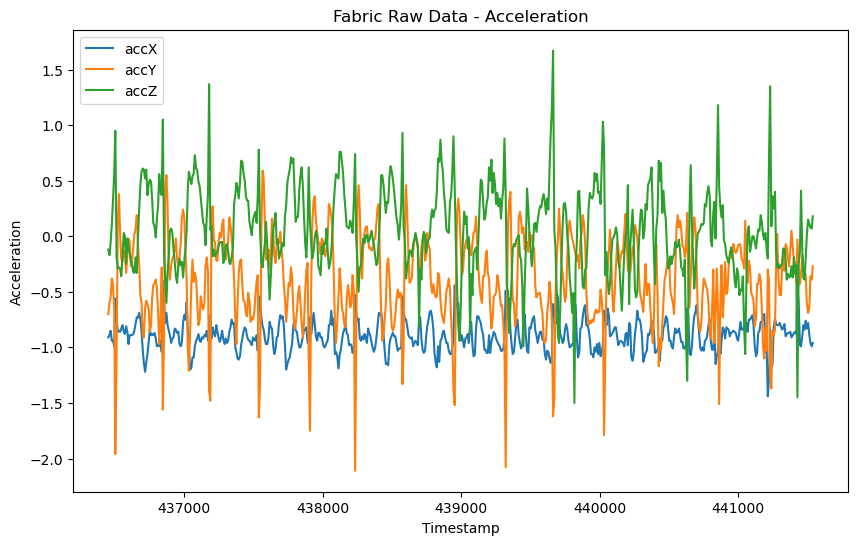

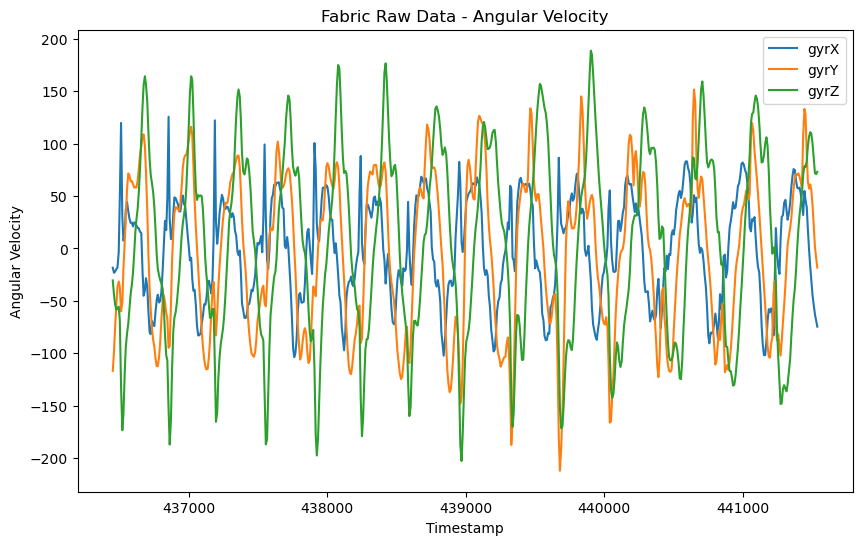

In [7]:
# ceramic 데이터의 raw data를 가져옵니다.
ceramic_raw_data = pd.read_csv(f'{data_path}{CERAMIC}')

# raw data를 시각화합니다.
sample_duration = 1000  # 1 second in milliseconds
ceramic_sample = ceramic_raw_data[1000:1595]

plt.figure(figsize=(10, 6))
plt.plot(ceramic_sample['timestamp'], ceramic_sample['accX'], label='accX')
plt.plot(ceramic_sample['timestamp'], ceramic_sample['accY'], label='accY')
plt.plot(ceramic_sample['timestamp'], ceramic_sample['accZ'], label='accZ')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.title('Ceramic Raw Data - Acceleration')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ceramic_sample['timestamp'], ceramic_sample['gyrX'], label='gyrX')
plt.plot(ceramic_sample['timestamp'], ceramic_sample['gyrY'], label='gyrY')
plt.plot(ceramic_sample['timestamp'], ceramic_sample['gyrZ'], label='gyrZ')
plt.xlabel('Timestamp')
plt.ylabel('Angular Velocity')
plt.title('Ceramic Raw Data - Angular Velocity')
plt.legend()
plt.show()

# fabric 데이터의 raw data를 가져옵니다.
fabric_raw_data = pd.read_csv(f'{data_path}{FABRIC}')

# raw data를 시각화합니다.
fabric_sample = fabric_raw_data[1000:1595]

plt.figure(figsize=(10, 6))
plt.plot(fabric_sample['timestamp'], fabric_sample['accX'], label='accX')
plt.plot(fabric_sample['timestamp'], fabric_sample['accY'], label='accY')
plt.plot(fabric_sample['timestamp'], fabric_sample['accZ'], label='accZ')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.title('Fabric Raw Data - Acceleration')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(fabric_sample['timestamp'], fabric_sample['gyrX'], label='gyrX')
plt.plot(fabric_sample['timestamp'], fabric_sample['gyrY'], label='gyrY')
plt.plot(fabric_sample['timestamp'], fabric_sample['gyrZ'], label='gyrZ')
plt.xlabel('Timestamp')
plt.ylabel('Angular Velocity')
plt.title('Fabric Raw Data - Angular Velocity')
plt.legend()
plt.show()


Your data has six columns now. If you want to add more columns that might reflect something helpful (e.g., magnitude), please implement them below (this is irrelevant to extra credit).

In [8]:
GLASS_.head()

,accX,accY,accZ,gyrX,gyrY,gyrZ,acc_intensity,gyr_intensity
timestamp,,,,,,,,
0 days 00:13:30.363000,-0.930,-0.190,0.270,7.020,-20.690,-4.21,0.986864,22.250407
0 days 00:13:30.371400,-0.926,-0.186,0.288,11.756,-20.996,-5.87,0.987429,24.768780
0 days 00:13:30.379800,-0.922,-0.182,0.306,16.492,-21.302,-7.53,0.988354,27.972525
0 days 00:13:30.388200,-0.918,-0.178,0.324,21.228,-21.608,-9.19,0.989638,31.654222
0 days 00:13:30.396600,-0.914,-0.174,0.342,25.964,-21.914,-10.85,0.991280,35.666163


### Split Data

Here, we will use data collected for the first four minutes as training data and data collected for the next one minute as test data.

In [9]:
import numpy as np


HZ = 119
X_train, y_train = [], []
X_test, y_test = [], []
# CERAMIC_, FABRIC_, GLASS_, METAL_, PAPER_, PLASTIC_BAG, PLASTIC_, STAINLESS_, WOOD_
for l, d in zip([0, 1, 2, 3, 4, 5, 6, 7, 8], [CERAMIC_, FABRIC_, GLASS_, METAL_, PAPER_, PLASTIC_BAG_, PLASTIC_, STAINLESS_, WOOD_]):
    
    for i in np.arange(0, 60 * 4, 1):
        s, e = i * HZ, (i + 1) * HZ
        X_train.append(d.iloc[s:e, :])

    for i in np.arange(60 * 4, 60 * 5, 1):
        s, e = i * HZ, (i + 1) * HZ
        X_test.append(d.iloc[s:e, :])

    y_train.append(np.repeat(l, 60 * 4))
    y_test.append(np.repeat(l, 60))

X_train, X_test = np.asarray(X_train), np.asarray(X_test) 
y_train, y_test = np.concatenate(y_train, axis=0), np.concatenate(y_test, axis=0)


print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')


X_train: (2160, 119, 8)
X_test: (540, 119, 8)


### Model Training
Now, it's the turn to train your model. Here is the requirements:
* As mentioned earlier, your model should receive an input whose length is **119**. 
* Your model should contain **convolution or recurrent layers**.
* Assign your model to the **model** variable.
* Use **a logistic loss** as the loss function.

Other than these requirements, you can try anything (e.g., epochs, batches, optimizers, etc.)

In [10]:
from tensorflow import keras


'''------ Begin: Model specification ------'''
### HERE IS THE SPECIFICATION OF YOUR MODEL ###
# model = keras.models.Sequential([
#     keras.layers.BatchNormalization(input_shape = (119, 8)),
#     keras.layers.Conv1D(
#         filters=64, kernel_size=7, padding = "same", 
#         activation = keras.activations.relu, 
#         kernel_initializer=keras.initializers.HeNormal(seed=42),
#     ), 
#     keras.layers.MaxPooling1D(
#         pool_size=2
#     ), 
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv1D(
#         filters=128, kernel_size=3, padding = "same",
#         activation = keras.activations.relu, 
#         kernel_initializer=keras.initializers.HeNormal(seed=42),
#     ), 
#     keras.layers.Conv1D(
#         filters=128, kernel_size=3, padding = "same",
#         activation = keras.activations.relu, 
#         kernel_initializer=keras.initializers.HeNormal(seed=42),
#     ), 
#     keras.layers.MaxPooling1D(
#         pool_size=2
#     ), 
#     keras.layers.BatchNormalization(),
#     keras.layers.Flatten(), 
#     keras.layers.Dense(
#         units = 64, 
#         activation=keras.activations.relu,
#         kernel_initializer=keras.initializers.HeNormal(seed=42),
#     ),
#     keras.layers.Dropout(
#         rate=0.5
#     ), 
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(
#         units = 32, 
#         activation=keras.activations.relu,
#         kernel_initializer=keras.initializers.HeNormal(seed=42),
#     ),
#     keras.layers.Dropout(
#         rate=0.5
#     ), 
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(
#         units = 9, 
#         activation=keras.activations.softmax,
#         kernel_initializer=keras.initializers.GlorotUniform(seed=42),
#     )
# ])

model = keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape = (119, 8)),
    keras.layers.Conv1D(
        filters=32, kernel_size=7, padding = "same", 
        activation = keras.activations.relu, 
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ), 
    keras.layers.MaxPooling1D(
        pool_size=2
    ), 
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(
        filters=64, kernel_size=3, padding = "same",
        activation = keras.activations.relu, 
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ), 
    keras.layers.MaxPooling1D(
        pool_size=2
    ), 
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(), 
    keras.layers.Dense(
        units = 32, 
        activation=keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.Dropout(
        rate=0.5
    ), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(
        units = 9, 
        activation=keras.activations.softmax,
        kernel_initializer=keras.initializers.GlorotUniform(seed=42),
    )
])

print(model.summary())


'''------ End: Model specification ------'''

'''------ Begin: Model compiling ------'''
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(),
    metrics=[
            keras.metrics.SparseCategoricalAccuracy(), 
    ]
)    
    # We will use a logistic loss as the loss function.
    # But, you can use any optimizers, metrics, or other options here.
    #loss=keras.losses.SparseCategoricalCrossentropy(),
    ### HERE IS THE SPECIFICATION OF OPTIMIZER, METRICS, etc... ###

'''------ End: Model compiling ------'''

'''------ Begin: Model fitting ------'''
model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=150
    ### HERE IS THE SPECIFICATION OF TRAINING OPTIONS ###
)

'''------ End: Model fitting ------'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 119, 8)           32        
 ormalization)                                                   
                                                                 
 conv1d (Conv1D)             (None, 119, 32)           1824      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 32)           0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 59, 32)           128       
 hNormalization)                                                 
                                                                 
 conv1d_1 (Conv1D)           (None, 59, 64)            6208      
                                                        

'------ End: Model fitting ------'

In [11]:
model.save('model.h5')

### Evaluation
Make sure you leave **a printed output of accuracy**. Based on it, we will grade your point.

In [12]:
from sklearn.metrics import accuracy_score


y_pred = np.argmax(model.predict(X_test), axis=1)
acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc * 100:.2f} %.')

17/17 [==============================] - 0s 14ms/step
Accuracy: 94.07 %.


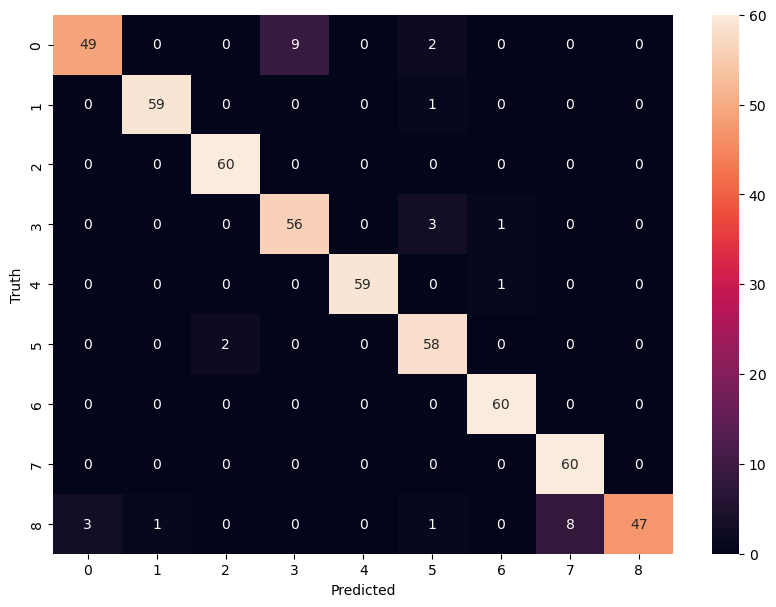

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Configure Defaults

In [14]:
# Define paths to model files
import os
MODELS_DIR = 'models/'
# os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model.pb'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

### Import Dependencies

In [15]:
# Keras is TensorFlow's high-level API for deep learning
import tensorflow as tf
from tensorflow import keras
# Plotly for graphing library
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Math is Python's math library
import math

### Generate a TensorFlow Lite Model

In [23]:
# load model
model = keras.models.load_model('model.h5')

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
model_no_quant_tflite = converter.convert()

# # Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

# Convert the model to the TensorFlow Lite format with quantization
def representative_dataset():
  for i in range(500):
    yield([X_train[i].reshape(119, 8)])

# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce full-int8 quantization
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.target_spec.supported_ops = [tf.float16]
# converter.inference_input_type = tf.int8
# converter.inference_output_type = tf.int8

# Provide a representative dataset to ensure we quantize correctly.
# converter.representative_dataset = representative_dataset
model_tflite = converter.convert() 
# just created two different models

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

INFO:tensorflow:Assets written to: C:\Users\UVR\AppData\Local\Temp\tmp89ub1_9e\assets


INFO:tensorflow:Assets written to: C:\Users\UVR\AppData\Local\Temp\tmp89ub1_9e\assets


INFO:tensorflow:Assets written to: C:\Users\UVR\AppData\Local\Temp\tmptdr_1iic\assets


INFO:tensorflow:Assets written to: C:\Users\UVR\AppData\Local\Temp\tmptdr_1iic\assets


79264

2. Compare Model Sizes

In [24]:
import sys, os
def format_size(variable):
    size_in_bytes = sys.getsizeof(variable)
    units = ["B", "KB", "MB", "GB", "TB"]
    unit_index = 0
    while size_in_bytes >= 1024 and unit_index < len(units) - 1:
        size_in_bytes /= 1024.0
        unit_index += 1
    return "{:.2f} {}".format(size_in_bytes, units[unit_index])

# quantize no/yes model comparison

print("Model is {}".format(format_size(model_no_quant_tflite)))
print("Quantized Model is {}".format(format_size(model_tflite)))

Model is 273.45 KB
Quantized Model is 77.44 KB


3. Test the Models (ppt. Invoke the models)
To prove these models are still accurate after conversion and quantization, we'll use both of them to make predictions and compare these against our test results:

In [28]:
# Instantiate an interpreter for each model. 
model_no_quant = tf.lite.Interpreter(MODEL_NO_QUANT_TFLITE)
model = tf.lite.Interpreter(MODEL_TFLITE)

# Allocate memory for each model
model_no_quant.allocate_tensors()
model.allocate_tensors()

# Get the input and output tensors so we can feed in values and get the results
model_no_quant_input = model_no_quant.tensor(model_no_quant.get_input_details()[0]["index"])
model_no_quant_output = model_no_quant.tensor(model_no_quant.get_output_details()[0]["index"])
model_input = model.tensor(model.get_input_details()[0]["index"])
model_output = model.tensor(model.get_output_details()[0]["index"])

# To quantize input and output tensor, it requires to use scales and zero_points of model.
# input_scale = model.get_input_details()[0]['quantization_parameters']['scales']
# input_zero_point = model.get_input_details()[0]['quantization_parameters']['zero_points']

# output_scale = model.get_output_details()[0]['quantization_parameters']['scales']
# output_zero_point = model.get_output_details()[0]['quantization_parameters']['zero_points']

# Create arrays to store the results
model_no_quant_predictions = np.empty(len(X_test))
model_predictions = np.empty(len(X_test))

# Quantize the input as np.uint8
# x_test_quantized = x_test/input_scale + input_zero_point
# x_test_quantized = x_test_quantized.astype(np.uint8)
shape = X_test[0].shape
model_no_quant_input_array = np.empty(shape, dtype='float32')
model_input_array = np.empty(shape, dtype='float32')

# Run each model's interpreter for each value and store the results in arrays
for i in range(len(X_test)):
  model_no_quant_input_array = X_test[i].astype('float32').reshape(1,119,8)
  model_input_array = X_test[i].astype('float32').reshape(1,119,8)
  
  model_no_quant.set_tensor(model_no_quant.get_input_details()[0]["index"], model_no_quant_input_array)
  # model_no_quant_input().fill(model_no_quant_input_array)
  model_no_quant.invoke()

  model.set_tensor(model.get_input_details()[0]["index"], model_input_array)
  model.invoke()

  model_no_quant_predictions[i] = np.argmax(model_no_quant_output()[0], axis=0)
  model_predictions[i] = np.argmax(model_output()[0], axis=0)

acc = accuracy_score(y_test, model_no_quant_predictions)
print(f'No Quant Accuracy: {acc * 100:.2f} %.')

acc = accuracy_score(y_test, model_predictions)
print(f'Quant Accuracy: {acc * 100:.2f} %.')

  # model_input().fill(x_test_quantized[i])
  # model.invoke()
  # model_predictions[i] = model_output()[0]

# model_predictions = model_predictions.astype(np.float32)
# model_predictions = (model_predictions - output_zero_point) * output_scale


No Quant Accuracy: 94.07 %.
Quant Accuracy: 94.26 %.


We can see from the graph that the predictions for the original model, the converted model, and the quantized model are all close enough to be indistinguishable. This means that our quantized model is ready to use!

Generate a TensorFlow Lite for Microcontrollers Model
Convert the TensorFlow Lite quantized model into a C source file that can be loaded by TensorFlow Lite for Microcontrollers.

In [ ]:
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd
# Convert to a C source file
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
# Update variable names
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

# generate model using arduino.xxd-get that tall, instol it.

Deploy to a Microcontroller
Follow the instructions in the hello_world README.md for TensorFlow Lite for MicroControllers to deploy this model on a specific microcontroller.

Reference Model: If you have not modified this notebook, you can follow the instructions as is, to deploy the model. Refer to the hello_world/train/models directory to access the models generated in this notebook.

New Model: If you have generated a new model, then update the values assigned to the variables defined in hello_world/model.cc with values displayed after running the following cell.



In [ ]:
# Print the C source file. 
!cat {MODEL_TFLITE_MICRO}
# just refer this function, run on arduino. 